In [1]:
%matplotlib inline
%autosave 60
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Autosaving every 60 seconds


In [38]:
# Définitions : 

# def const(x0,dx0,phi,k,m,e):
#     cste=np.zeros(2)
#     if phi==0 or dx0=0:
#         cste[0]=
#         cste[1]=0
#         return cste
#     else
#         cste[0]=
#         cste[1]=0
#         return cste
        
    
def raideur1(E,I,L):
    return 24*E*I/(L**3)
def raideur2(E,S,L):
    return 2*S*E/L
def condinit(F,K):
    return F/k
def reponselibre(t,x0,dx0,phi,k,m,e):
    c=2*e*np.sqrt(k*m)
    if e==1:
        wn=np.sqrt(k/m)
        A=dx0+wn*x0
        B=x0
        return (A*t+B)*np.exp(-wn*t)
    elif e<1:
        D=x0/(np.cos(phi))
        A=-c/(2*m)
        B=np.sqrt(4*k*m-c**2)/(2*m)
        return D*np.exp(A*t)*(np.cos(B*t+phi))
    else : #suramortissement
        wn=np.sqrt(k/m)
        C=-e-np.sqrt(-1+e**2)
        D=-e+np.sqrt(-1+e**2)
        a = np.array([[1,1], [C,D]])
        b = np.array([x0,dx0/wn])
        x = np.linalg.solve(a, b) #constante d'intégration A et B
        return x[0]*np.exp(C*wn*t)+x[1]*np.exp(D*wn*t)

In [39]:
# bloc en laiton
l=0.10 #10cm
ab=0.05
bb=0.05
v=l*ab*bb #volume
rhob=8600
m=v*rhob
# poutre section rectangulaire en aluminium
h=0.10
a=0.05
b=0.0005 #a>>b
I=(a*b**3)/12
E=74*10**9
rho=2800 #aluminium alliee

t=np.linspace(0,120,1./2**7) #Axe horizontale pour la solution analytique




## Cas 1

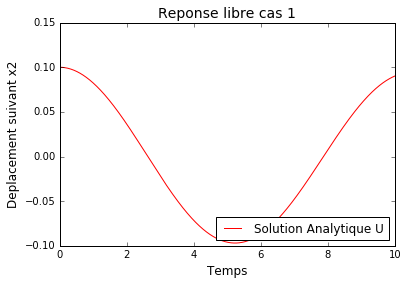

In [42]:
x0=0.10 #1 cm
dx0=0
phi=0
t=np.linspace(0,10,1000) #Axe horizontale pour la solution analytique
plt.plot(t,reponselibre(t,x0,dx0,phi,raideur1(E,I,h),m,0.01),'r',label='Solution Analytique U')
plt.legend(loc='lower right')
plt.xlabel('Temps',fontsize=12)
plt.ylabel('Deplacement suivant x2',fontsize=12)
plt.title("Reponse libre cas 1", fontsize=14)
#plt.savefig('D:\Google Drive - Mohamed\Cours\S1\Reponse libre cas 1.png',dpi=800)


# print reponselibre(t,x0,dx0,phi,raideur1(E,I,h),m,0.01)
# print len(t)

## Cas 2

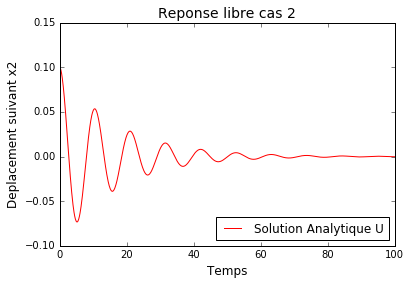

In [45]:
x0=0.10 #1 cm
dx0=0
phi=0
t=np.linspace(0,100,1000) #Axe horizontale pour la solution analytique
plt.plot(t,reponselibre(t,x0,dx0,phi,raideur2(E,I,h),m,0.1),'r',label='Solution Analytique U')
plt.legend(loc='lower right')
plt.xlabel('Temps',fontsize=12)
plt.ylabel('Deplacement suivant x2',fontsize=12)
plt.title("Reponse libre cas 2", fontsize=14)